# 逻辑回归预测芯片质量

In [1]:
# 加载数据
import pandas as pd
import numpy as np

data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [7]:
# 定义数据
X = data.drop(['pass'], axis = 1)
y = data.loc[:, 'pass']
X1 = data.loc[:, 'test1']
X2 = data.loc[:, 'test2']
mask = data.loc[:, 'pass'] == 1

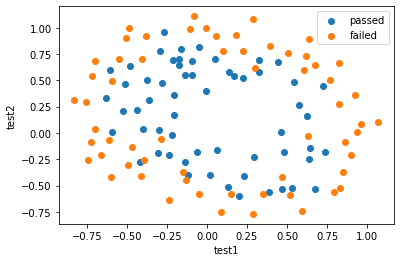

In [13]:
# 可视化数据
import matplotlib.pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(X1[mask], X2[mask])
failed = plt.scatter(X1[~mask], X2[~mask])
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [14]:
# new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = pd.DataFrame({'X1':X1, 'X2':X2, 'X1_2':X1_2, 'X2_2':X2_2, 'X1_X2':X1_X2})
X_new

,X1,X2,X1_2,X2_2,X1_X2
0,0.051267,0.699560,0.002628,0.489384,0.035864
1,-0.092742,0.684940,0.008601,0.469143,-0.063523
2,-0.213710,0.692250,0.045672,0.479210,-0.147941
3,-0.375000,0.502190,0.140625,0.252195,-0.188321
4,0.183760,0.933480,0.033768,0.871385,0.171536
...,...,...,...,...,...
113,-0.720620,0.538740,0.519293,0.290241,-0.388227
114,-0.593890,0.494880,0.352705,0.244906,-0.293904
115,-0.484450,0.999270,0.234692,0.998541,-0.484096
116,-0.006336,0.999270,0.000040,0.998541,-0.006332


In [15]:
# 创建逻辑回归模型,并训练它
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_new, y)

LogisticRegression()

In [16]:
# 模型评估
from sklearn.metrics import accuracy_score
y_predict = LR_model.predict(X_new)
accuracy = accuracy_score(y, y_predict)
accuracy

0.8135593220338984

In [22]:
# 通过X1计算X2的函数
def f(x):
    theta0 = LR_model.intercept_
    theta1, theta2, theta3, theta4, theta5 = LR_model.coef_[0][0], LR_model.coef_[0][1], LR_model.coef_[0][2], LR_model.coef_[0][3], LR_model.coef_[0][4]
    a = theta4
    b = theta5 * x + theta2
    c = theta0 + theta1 * x + theta3 * x * x
    x_boundary1 = (-b + np.sqrt(b * b - 4 * a * c)) / (2 * a)
    x_boundary2 = (-b - np.sqrt(b * b - 4 * a * c)) / (2 * a)
    return x_boundary1, x_boundary2

In [36]:
#定义新的X1,通过计算得到新的X2
X1_new = [-0.9 + x / 10000 for x in range(0, 19000)]
X2_new1 = []
X2_new2 = []
for x in X1_new:
    X2_new1.append(f(x)[0])
    X2_new2.append(f(x)[1])

C:\Users\Glong\AppData\Local\Temp\ipykernel_7976\1696809278.py:8: RuntimeWarning: invalid value encountered in sqrt
  x_boundary1 = (-b + np.sqrt(b * b - 4 * a * c)) / (2 * a)
C:\Users\Glong\AppData\Local\Temp\ipykernel_7976\1696809278.py:9: RuntimeWarning: invalid value encountered in sqrt
  x_boundary2 = (-b - np.sqrt(b * b - 4 * a * c)) / (2 * a)


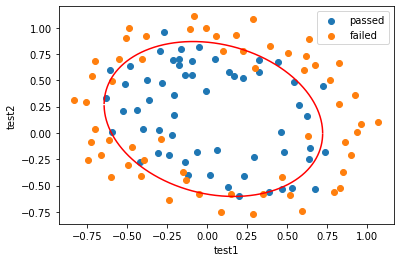

In [38]:
# 画出边界函数图像
fig2 = plt.figure()
passed = plt.scatter(X1[mask], X2[mask])
failed = plt.scatter(X1[~mask], X2[~mask])
plt.plot(X1_new, X2_new1, 'r')
plt.plot(X1_new, X2_new2, 'r')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()